# Iterative Methods

Consider an equation of the form
$$-u'' = f$$
defined over an interval $[a,b]$ and where $f = f(x)$ is a real-valued function

The boundary conditions for this equation are given as
$$u(a) = \alpha$$
$$u(b) = \beta$$

Create a partition on this domain of $N$ points $x_{i}$ such that
$$x_{i} = a + i \Delta x$$
where,
$\Delta x = \frac{b-a}{N-1}$, is the size of the partition.
By using the Finite Difference Approximation for $u''$, we get
$$-\frac{U_{i+1} -2U_{i} + U_{i-1}}{\Delta x^{2}} = f_{i}, \qquad i = 1,2,\ldots,N-2$$

# Gauss-Jacobi Method

For the 1-D BVP we have,
$$- \frac{U_{i+1} - 2 \cdot U_{i} + U_{i-1}}{\Delta x^{2}} = f_{i} \qquad i = 1,\ldots,N-2$$
Hence,
$$U_{i} = \frac{1}{2} (\Delta x^{2} f_{i} + U_{i+1} + U_{i-1}) \qquad i = 1,\ldots,N-2$$
We define the iteration as follows,
$$U_{i}^{(m+1)} = \frac{1}{2} (\Delta x^{2} f_{i} + U_{i+1}^{(m)} + U_{i-1}^{(m)}) \qquad i = 1,\ldots,N-2 \qquad m \ge 0$$
Thus the residue can be defined as
$$\lVert e^{(m)} \rVert = \sqrt{\sum_{i=1}^{N-1} \left( f_{i} + \left(\frac{U_{i+1}^{(m)} - 2 U_{i}^{(m)} + U_{i-1}^{(m)}}{\Delta x^{2}} \right) \right)^{2}} $$
The initial iteration value is chosen as 0.
$$U_{i}^{(0)} = 0 \qquad i=1,\ldots,N-1$$
Hence,
$$\lVert e^{(0)} \rVert = \sqrt{\sum_{i=1}^{N-1} \left( f_{i} \right)^{2}}$$
The relative residue or tolerance can hence be defined as
$$\mu = \frac{\lVert e^{(m)} \rVert}{\lVert e^{(0)} \rVert}$$

# Gauss-Seidel Method

For the 1-D BVP we have,
$$- \frac{U_{i+1} - 2 \cdot U_{i} + U_{i-1}}{\Delta x^{2}} = f_{i} \qquad i = 1,\ldots,N-2$$
Hence,
$$U_{i} = \frac{1}{2} (\Delta x^{2} f_{i} + U_{i+1} + U_{i-1}) \qquad i = 1,\ldots,N-2$$
We define the iteration as follows,
$$U_{i}^{(m+1)} = \frac{1}{2} (\Delta x^{2} f_{i} + U_{i+1}^{(m)} + U_{i-1}^{(m+1)}) \qquad i = 1,\ldots,N-2 \qquad m \ge 0$$
Thus the residue can be defined as
$$\lVert e^{(m)} \rVert = \sqrt{\sum_{i=1}^{N-1} \left( f_{i} + \left(\frac{U_{i+1}^{(m)} - 2 U_{i}^{(m)} + U_{i-1}^{(m)}}{\Delta x^{2}} \right) \right)^{2}} $$
The initial iteration value is chosen as 0.
$$U_{i}^{(0)} = 0 \qquad i=1,\ldots,N-1$$
Hence,
$$\lVert e^{(0)} \rVert = \sqrt{\sum_{i=1}^{N-1} \left( f_{i} \right)^{2}}$$
The relative residue or tolerance can hence be defined as
$$\mu = \frac{\lVert e^{(m)} \rVert}{\lVert e^{(0)} \rVert}$$

# Implementation

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib import pyplot as plt
import math

## Build the Relative Residue

In [3]:
def findRelativeResidue(dx, U, f):
    """
    This method takes partition size dx, the solution vector U and the function vector f
    """
    N = len(U)
    mresidue = 0.0
    zeroresidue = 0.0
    for i in range(1,N-2):
        mresiduehelper = f[i] + (U[i+1] - 2*U[i] + U[i-1])/dx**2
        mresidue += mresiduehelper**2
        zeroresidue += f[i]**2
    relativeresidue = np.sqrt(mresidue/zeroresidue)
    return relativeresidue

## Set the global variables for the test cases

In [4]:
d = (0,1)
N = 60
dx = (d[1] - d[0])/(N-1)
x = np.linspace(d[0],d[1],N)
tolerance = 1.0e-6
MAXITER = 10000

## Test Case 1:
$$f = 1$$

### Gauss-Jacobi Method

Number of Gauss-Jacobi iterations: 9678


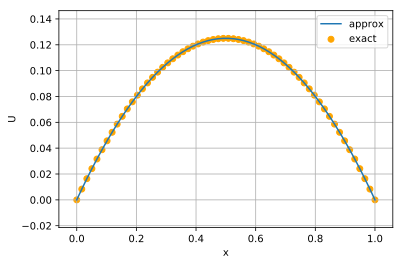

In [10]:
def test_jacobi(f,uexact):
    U_prev = np.zeros(N)
    U_next = np.zeros(N)
    for iteration in range(MAXITER):
        U_prev[:] = U_next
        for i in range(1,N-1):
            U_next[i] = 0.5*(dx**2*f[i] + U_prev[i-1] + U_prev[i+1])
        diff = findRelativeResidue(dx,U_next,f)
        if diff < tolerance:
            break
    plt.scatter(x,uexact,color='orange',label="exact")
    plt.legend()
    plt.plot(x,U_next,label="approx")
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('U')
    plt.grid(True)
    plt.savefig('it3.png')
    print("Number of Gauss-Jacobi iterations: " + str(iteration))
    
f = np.ones(N)
uexact = 0.5 * x * (1-x)
test_jacobi(f,uexact)

### Gauss-Seidel Method

Number of Gauss-Seidel iterations: 4840


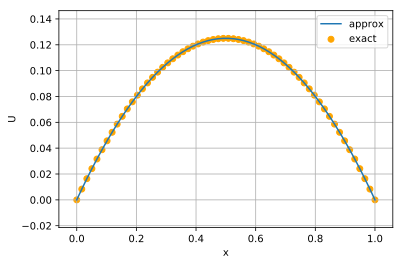

In [11]:
def test_seidel(f,uexact):
    U = np.zeros(N)
    for iteration in range(MAXITER):
        for i in range(1,N-1):
            U[i] = 0.5*(dx**2*f[i] + U[i-1] + U[i+1])
        diff = findRelativeResidue(dx,U,f)
        if diff < tolerance:
            break
    plt.scatter(x,uexact,color='orange',label="exact")
    plt.legend()
    plt.plot(x,U,label="approx")    
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('U')
    plt.grid(True)
    plt.savefig('it4.png')
    print("Number of Gauss-Seidel iterations: " + str(iteration))

test_seidel(f,uexact)

## Test Case 2:
$$f = sin(2 \pi x)$$

### Gauss-Jacobi Method

Number of Gauss-Jacobi iterations: 2431


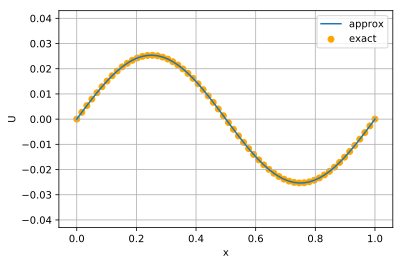

In [12]:
g = lambda x: math.sin(2*math.pi*x)
vfunc = np.vectorize(g)
f = vfunc(x)
uexact = np.sin(2*math.pi*x)/(4*math.pi**2)
test_jacobi(f,uexact)

### Gauss-Seidel Method

Number of Gauss-Seidel iterations: 3392


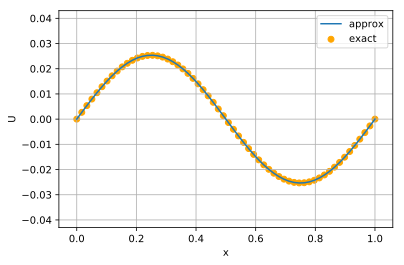

In [13]:
test_seidel(f,uexact)

# Comparison

In the Gauss-Jacobi Method on $Ax=b$, the iteration form is reduced to,
$$x_{i}^{(m+1)} = \frac{1}{a_{ii}}\left \{ b_{i} - \sum_{\substack{j=0 \\ j\ne i}}^{N-1}a_{ij}x_{j}^{(m)} \right \} \qquad i = 0,\ldots, N-1 \qquad m \ge 0$$
But in the Gauss-Seidel Method on $Ax = b$
$$x_{i}^{(m+1)} = \frac{1}{a_{ii}} \left( b_{i} - \sum_{j=0}^{i-1}a_{ij}x_{j}^{(m+1)} - \sum_{j=i+1}^{N-1}a_{ij}x_{j}^{(m)} \right)$$
Hence in the Gauss-Seidel the new component $x_{i}^{(m+1)}$ is used immediately in the computation of the next component

Now, consider the rate of convergence of both the methods. Intuitively this is the speed at which the error tends to $0$ or in this case close to the tolerance value.

This rate can be defined as,
$$rate = \lim_{m \to \infty}\frac{\lVert e^{(m)} \rVert}{\lVert e^{(m-1)} \rVert}$$
for some iteration $m$
Let $rate_{j}$ denote the Jacobi rate and $rate_{s}$ denote the Seidel rate. Since this program has limited iteration capacity, the $m \to \infty$ is essentially the value of $m$ close to the tolerance value

Let us compute the values of these rates.

In [40]:
def jacobirate(f):
    U_prev = np.zeros(N)
    U_next = np.zeros(N)
    for iteration in range(MAXITER):
        U_prev[:] = U_next
        for i in range(1,N-1):
            U_next[i] = 0.5*(dx**2*f[i] + U_prev[i-1] + U_prev[i+1])
        diff = findRelativeResidue(dx,U_next,f)
        if diff < tolerance:
            rate = (findRelativeResidue(dx,U_next,f))/((findRelativeResidue(dx,U_prev,f)))
            break
    return rate
print("rate_j = " + str(jacobirate(f)))

rate_j = 0.9943348003716779


In [41]:
def seidelrate(f):
    U = np.zeros(N)
    for iteration in range(MAXITER):
        error = findRelativeResidue(dx,U,f)
        for i in range(1,N-1):
            U[i] = 0.5*(dx**2*f[i] + U[i-1] + U[i+1])
        diff = findRelativeResidue(dx,U,f)
        if diff < tolerance:
            rate = diff/error
            break
    return rate
print("rate_s = " + str(seidelrate(f)))

rate_s = 0.9971674007075015


Even though the difference is small, we can see that
$$rate_j < rate_s$$
And thus the Gauss Siedel Method is marginally faster than the Gauss Jacobi Method